In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
df = pd.read_csv('../cleaned-data.csv')

In [227]:
df.head()

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface,sub_property_group_encoded
0,2600,Berchem,Antwerpen,0,apartment,149000.0,good,2.0,48,installed,1,0,0,0,9,0,0,apartments
1,2100,Deurne,Antwerpen,0,apartment,248000.0,good,2.0,91,installed,3,0,0,0,2,0,0,apartments
2,2660,Hoboken,Antwerpen,0,apartment,229000.0,good,2.0,100,not installed,3,0,0,0,26,0,0,apartments
3,1180,Uccle,Bruxelles,0,apartment,470000.0,good,2.0,179,equipped,3,0,0,0,10,0,0,apartments
4,2018,Antwerpen,Antwerpen,0,apartment,480000.0,good,2.0,116,installed,2,0,0,0,7,0,0,apartments


In [4]:
print(df.sub_property_group_encoded.value_counts(dropna=False))

sub_property_group_encoded
apartments           15039
houses                8868
luxury_properties     1222
other                  835
rural                  142
Name: count, dtype: int64


In [5]:
print(df.swimming_pool.value_counts(dropna=False))
print(df.open_fire.value_counts(dropna=False))
print(df.furnished.value_counts(dropna=False))

swimming_pool
0    25599
1      507
Name: count, dtype: int64
open_fire
0    25911
1      195
Name: count, dtype: int64
furnished
0    25269
1      837
Name: count, dtype: int64


In [6]:
print(df.subtype_of_property.value_counts(dropna=False))

subtype_of_property
apartment               12508
house                    8039
villa                     895
ground floor              749
penthouse                 685
flat studio               661
duplex                    585
mixed use building        358
kot                       323
apartment block           319
exceptional property      158
service flat              156
mansion                   148
loft                      113
town house                102
country cottage            92
bungalow                   91
triplex                    51
farmhouse                  38
manor house                12
chalet                     12
castle                      9
other property              2
Name: count, dtype: int64


In [240]:
df.price.value_counts()
df['prices_count'] = df.groupby('price')['price'].transform('count')
df.head(40)

,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface,sub_property_group_encoded,prices_count
0,2600,Berchem,Antwerpen,0,apartment,149000.0,good,2.0,48,installed,1,0,0,0,9,0,0,apartments,93
1,2100,Deurne,Antwerpen,0,apartment,248000.0,good,2.0,91,installed,3,0,0,0,2,0,0,apartments,18
2,2660,Hoboken,Antwerpen,0,apartment,229000.0,good,2.0,100,not installed,3,0,0,0,26,0,0,apartments,145
3,1180,Uccle,Bruxelles,0,apartment,470000.0,good,2.0,179,equipped,3,0,0,0,10,0,0,apartments,55
4,2018,Antwerpen,Antwerpen,0,apartment,480000.0,good,2.0,116,installed,2,0,0,0,7,0,0,apartments,55
5,1050,Ixelles,Bruxelles,0,apartment,695000.0,good,2.0,150,installed,2,0,0,0,1,0,0,apartments,131
6,2160,Wommelgem,Antwerpen,0,apartment,249000.0,good,2.0,99,installed,3,0,0,0,4,0,0,apartments,296
7,2850,Boom,Antwerpen,0,apartment,249900.0,good,2.0,125,installed,2,0,0,0,13,0,0,apartments,23
8,2660,Hoboken,Antwerpen,0,apartment,265000.0,good,2.0,90,installed,2,0,0,0,14,0,0,apartments,206
9,8500,Kortrijk,West-Vlaanderen,0,apartment,349000.0,good,2.0,110,installed,2,0,0,0,8,0,0,apartments,259


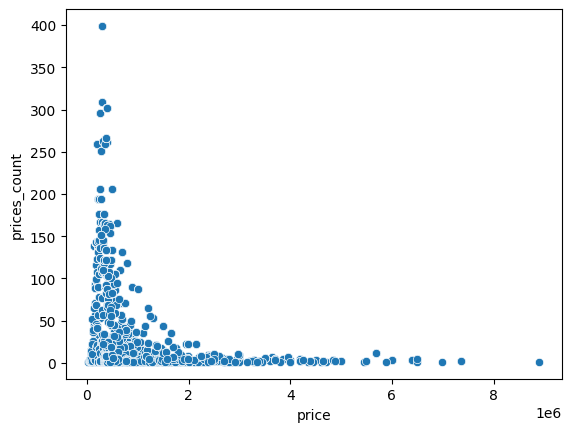

In [241]:
price_scatter = sns.scatterplot(data=df, x='price', y='prices_count')

In [35]:
print(df.equipped_kitchen.value_counts(dropna=False))
#not installed, installed, equipped

equipped_kitchen
not installed    10121
equipped          8248
installed         7737
Name: count, dtype: int64


In [138]:
import statistics
mean_price = statistics.mean(df.price)
standard_d = statistics.stdev(df.price)

upper_bound = round(mean_price + 3 * standard_d)
df_bounded = df[df['price'] < upper_bound]


In [140]:
df_bounded = df[df['price'] < upper_bound]
df_bounded.sub_property_group_encoded.value_counts()


sub_property_group_encoded
apartments           14851
houses                8772
luxury_properties     1076
other                  824
rural                  132
Name: count, dtype: int64

In [158]:
df_bounded.plot_surface.describe()

count     25655.000000
mean        343.246502
std        1776.506030
min           0.000000
25%           0.000000
50%           0.000000
75%         249.000000
max      100000.000000
Name: plot_surface, dtype: float64

In [209]:
df_ppsm = df_bounded
df_ppsm['price_per_sm'] = df_ppsm['price'] / df_ppsm['living_area']

df_ppsm.head()

C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\3673632842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ppsm['price_per_sm'] = df_ppsm['price'] / df_ppsm['living_area']


,zip_code,commune,province,type_of_property,subtype_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,bedroom_nr,swimming_pool,furnished,open_fire,terrace,garden,plot_surface,sub_property_group_encoded,price_per_sm
0,2600,Berchem,Antwerpen,0,apartment,149000.0,good,2.0,48,installed,1,0,0,0,9,0,0,apartments,3104.166667
1,2100,Deurne,Antwerpen,0,apartment,248000.0,good,2.0,91,installed,3,0,0,0,2,0,0,apartments,2725.274725
2,2660,Hoboken,Antwerpen,0,apartment,229000.0,good,2.0,100,not installed,3,0,0,0,26,0,0,apartments,2290.000000
3,1180,Uccle,Bruxelles,0,apartment,470000.0,good,2.0,179,equipped,3,0,0,0,10,0,0,apartments,2625.698324
4,2018,Antwerpen,Antwerpen,0,apartment,480000.0,good,2.0,116,installed,2,0,0,0,7,0,0,apartments,4137.931034


In [210]:
to_graf_mean_province_price = df_ppsm.groupby(['province']).price.mean().round().to_frame().sort_values(by='price', ascending=False)

print(to_graf_mean_province_price.head(40))
to_graf_mean_province_price.reset_index()
print(to_graf_mean_province_price.shape)
print(to_graf_mean_province_price.index)

                    price
province                 
Bruxelles        482656.0
Vlaams Brabant   472542.0
West-Vlaanderen  464522.0
Brabant Wallon   453221.0
Antwerpen        422567.0
Oost-Vlaanderen  407238.0
Limburg          379013.0
Luxembourg       328176.0
Namur            294283.0
Liège            286587.0
Hainaut          281820.0
(11, 1)
Index(['Bruxelles', 'Vlaams Brabant', 'West-Vlaanderen', 'Brabant Wallon',
       'Antwerpen', 'Oost-Vlaanderen', 'Limburg', 'Luxembourg', 'Namur',
       'Liège', 'Hainaut'],
      dtype='object', name='province')


C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\3757060823.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(xlabels)
C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\3757060823.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g1.text(to_graf_mean_province_price['price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')


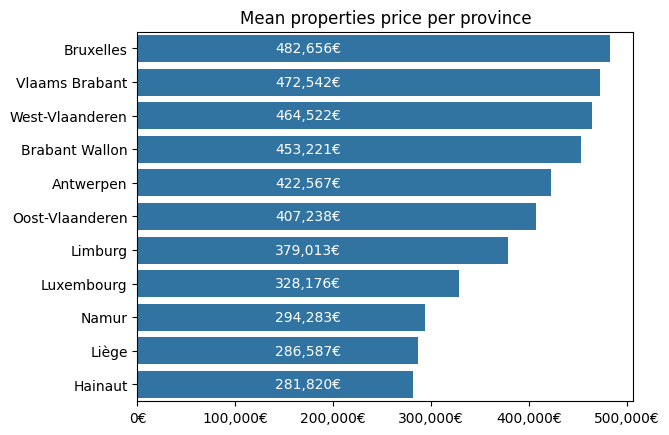

In [211]:
g1 = sns.barplot(data=to_graf_mean_province_price , x='price', y='province',)
g1.set(xlabel=None)
g1.set(ylabel=None)
plt.title('Mean properties price per province')
ticks = g1.get_xticks()
xlabels = ['{:,.0f}'.format(x) + '€' for x in ticks]
g1.set_xticklabels(xlabels)

for i, v in enumerate(to_graf_mean_province_price['price']):
    g1.text(to_graf_mean_province_price['price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')

In [191]:
to_graf_mean_province_price_ptype = df_ppsm.groupby(['province', 'type_of_property']).price.mean().round().to_frame()


to_graf_mean_province_price_ptype = to_graf_mean_province_price_ptype.reset_index()
apartments_df = (to_graf_mean_province_price_ptype[to_graf_mean_province_price_ptype.type_of_property == 0].sort_values(['price'], ascending=False))
province_list = apartments_df['province'].tolist()
houses_df = to_graf_mean_province_price_ptype[to_graf_mean_province_price_ptype.type_of_property == 1].sort_values(by='province', key=lambda col: col.map(lambda e:province_list.index(e)))
to_graf_mean_province_price_ptype = pd.concat([apartments_df, houses_df])
to_graf_mean_province_price_ptype.rename(columns={'type_of_property': 'property type'}, inplace=True)
to_graf_mean_province_price_ptype.loc[to_graf_mean_province_price_ptype['property type'] == 0, 'property type'] = 'apartements'
to_graf_mean_province_price_ptype.loc[to_graf_mean_province_price_ptype['property type'] == 1, 'property type'] = 'houses'

to_graf_mean_province_price_ptype.head(40)
#to_graf_mean_province_price_ptype.set_index('price', inplace=True)

C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\3188500743.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'apartements' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  to_graf_mean_province_price_ptype.loc[to_graf_mean_province_price_ptype['property type'] == 0, 'property type'] = 'apartements'


,province,property type,price
20,West-Vlaanderen,apartements,459774.0
4,Bruxelles,apartements,440725.0
2,Brabant Wallon,apartements,392847.0
0,Antwerpen,apartements,366154.0
18,Vlaams Brabant,apartements,366051.0
16,Oost-Vlaanderen,apartements,355274.0
8,Limburg,apartements,333027.0
14,Namur,apartements,290456.0
12,Luxembourg,apartements,271294.0
6,Hainaut,apartements,256156.0


In [ ]:
for x in (to_graf_mean_province_price_ptype['price'].tolist()):
    print(x)
value_list = 

print(len((to_graf_mean_province_price_ptype['price'].tolist())))

459774.0
440725.0
392847.0
366154.0
366051.0
355274.0
333027.0
290456.0
271294.0
256156.0
254352.0
472751.0
702378.0
507152.0
517907.0
551235.0
446485.0
452741.0
301433.0
372141.0
305484.0
307579.0
22


C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\4236380075.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(xlabels)


[Text(0.0, 0, '0€'),
 Text(100000.0, 0, '100,000€'),
 Text(200000.0, 0, '200,000€'),
 Text(300000.0, 0, '300,000€'),
 Text(400000.0, 0, '400,000€'),
 Text(500000.0, 0, '500,000€'),
 Text(600000.0, 0, '600,000€'),
 Text(700000.0, 0, '700,000€'),
 Text(800000.0, 0, '800,000€')]

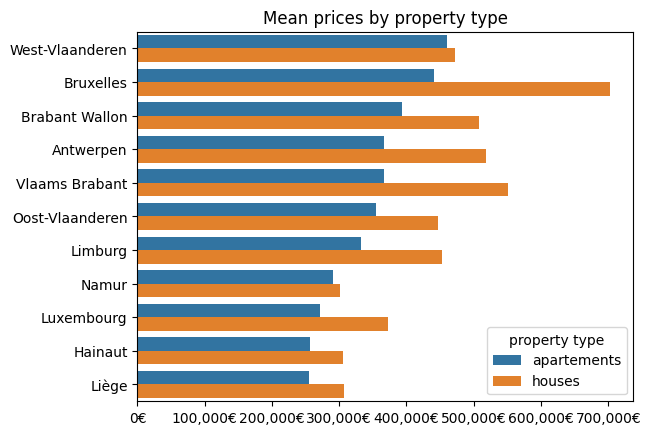

In [ ]:
g2 = sns.barplot(data=to_graf_mean_province_price_ptype, x='price', y='province', hue='property type')
g2.set(xlabel=None)
g2.set(ylabel=None)
plt.title('Mean prices by property type')

ticks = g2.get_xticks()
xlabels = ['{:,.0f}'.format(x) + '€' for x in ticks]
g2.set_xticklabels(xlabels)


In [216]:
to_graf_mean_province_sqm_price = df_ppsm.groupby(['province']).price_per_sm.mean().round().to_frame().sort_values(by='price_per_sm', ascending=False)
to_graf_mean_province_sqm_price.rename(columns={'price_per_sm': 'sqm price'}, inplace=True)
print(to_graf_mean_province_sqm_price.head(40))
#to_graf_mean_province_sqm_price.reset_index()


                 sqm price
province                  
Bruxelles           4478.0
West-Vlaanderen     4176.0
Vlaams Brabant      3400.0
Antwerpen           3228.0
Brabant Wallon      3157.0
Limburg             2922.0
Oost-Vlaanderen     2896.0
Namur               2787.0
Liège               2413.0
Luxembourg          2405.0
Hainaut             2222.0


C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\634011740.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels(xlabels)
C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\634011740.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g3.text(to_graf_mean_province_sqm_price['sqm price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')


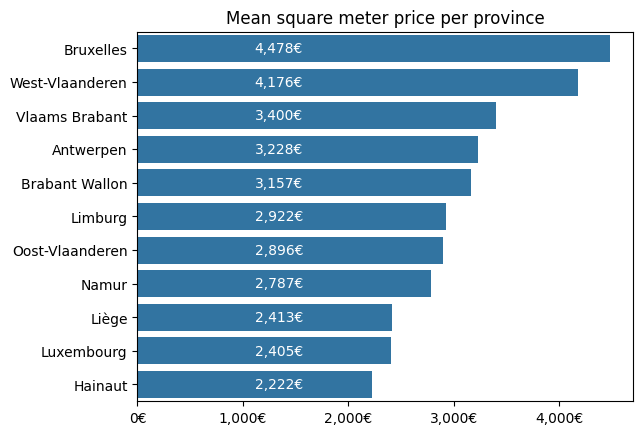

In [218]:
g3 = sns.barplot(data=to_graf_mean_province_sqm_price , x='sqm price', y='province',)
g3.set(xlabel=None)
g3.set(ylabel=None)
plt.title('Mean square meter price per province')
ticks = g3.get_xticks()
xlabels = ['{:,.0f}'.format(x) + '€' for x in ticks]
g3.set_xticklabels(xlabels)

for i, v in enumerate(to_graf_mean_province_sqm_price['sqm price']):
    g3.text(to_graf_mean_province_sqm_price['sqm price'][-1]/2, i, str('{:,.0f}'.format(v) + '€'), va='center', color='w')

In [221]:
to_graf_mean_province_sqm_price_ptype = df_ppsm.groupby(['province', 'type_of_property']).price_per_sm.mean().round().to_frame()


to_graf_mean_province_sqm_price_ptype = to_graf_mean_province_sqm_price_ptype.reset_index()
apartments_df = (to_graf_mean_province_sqm_price_ptype[to_graf_mean_province_sqm_price_ptype.type_of_property == 0].sort_values(['price_per_sm'], ascending=False))
province_list = apartments_df['province'].tolist()
houses_df = to_graf_mean_province_sqm_price_ptype[to_graf_mean_province_sqm_price_ptype.type_of_property == 1].sort_values(by='province', key=lambda col: col.map(lambda e:province_list.index(e)))
to_graf_mean_province_sqm_price_ptype = pd.concat([apartments_df, houses_df])
to_graf_mean_province_sqm_price_ptype.rename(columns={'type_of_property': 'property type', 'price_per_sm': 'sqm price'}, inplace=True)
to_graf_mean_province_sqm_price_ptype.loc[to_graf_mean_province_sqm_price_ptype['property type'] == 0, 'property type'] = 'apartements'
to_graf_mean_province_sqm_price_ptype.loc[to_graf_mean_province_sqm_price_ptype['property type'] == 1, 'property type'] = 'houses'

to_graf_mean_province_sqm_price_ptype.head(40)

C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\404821406.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'apartements' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  to_graf_mean_province_sqm_price_ptype.loc[to_graf_mean_province_sqm_price_ptype['property type'] == 0, 'property type'] = 'apartements'


,province,property type,sqm price
20,West-Vlaanderen,apartements,5125.0
4,Bruxelles,apartements,4680.0
18,Vlaams Brabant,apartements,4360.0
2,Brabant Wallon,apartements,3778.0
0,Antwerpen,apartements,3616.0
16,Oost-Vlaanderen,apartements,3586.0
8,Limburg,apartements,3401.0
10,Liège,apartements,3393.0
14,Namur,apartements,3289.0
12,Luxembourg,apartements,3015.0


C:\Users\aleks\AppData\Local\Temp\ipykernel_10412\3732969762.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g4.set_xticklabels(xlabels)


[Text(0.0, 0, '0€'),
 Text(1000.0, 0, '1,000€'),
 Text(2000.0, 0, '2,000€'),
 Text(3000.0, 0, '3,000€'),
 Text(4000.0, 0, '4,000€'),
 Text(5000.0, 0, '5,000€'),
 Text(6000.0, 0, '6,000€')]

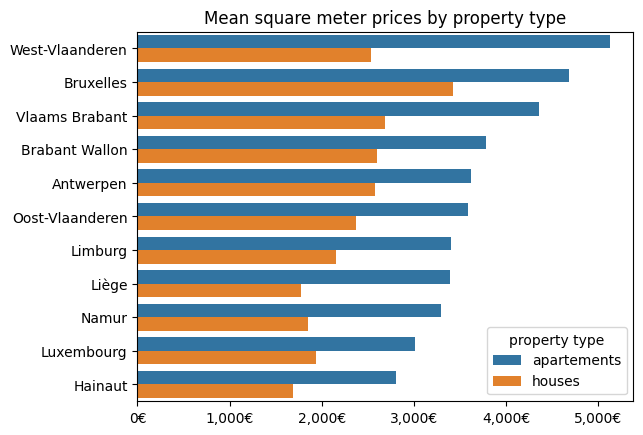

In [223]:
g4 = sns.barplot(data=to_graf_mean_province_sqm_price_ptype, x='sqm price', y='province', hue='property type')
g4.set(xlabel=None)
g4.set(ylabel=None)
plt.title('Mean square meter prices by property type')

ticks = g4.get_xticks()
xlabels = ['{:,.0f}'.format(x) + '€' for x in ticks]
g4.set_xticklabels(xlabels)